Libraries

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

Directories Paths

In [ ]:
#Directories containing the images and labels
image_dir = 'data_object_image_2/training/image_2/'
label_dir = 'yolo_labels/'

#Output directories
output_image_train = 'dataset/images/train/'  #Training images
output_image_val = 'dataset/images/val/'  #Validation images
output_label_train = 'dataset/labels/train/'  #Training labels
output_label_val = 'dataset/labels/val/'  #Validation labels

In [ ]:
#Create the output directories
os.makedirs(output_image_train, exist_ok=True)
os.makedirs(output_image_val, exist_ok=True)
os.makedirs(output_label_train, exist_ok=True)
os.makedirs(output_label_val, exist_ok=True)

In [ ]:
#Get the list of image files in the image directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

Dataset Split

In [ ]:
#Randomly divide the images into 80% training and 20% validation
train_images, val_images = train_test_split(image_files, test_size=0.2, random_state=42)

Move or Copy Image and Corresponding Label Files to the Target Directories

In [ ]:
def move_files(image_list, image_output_dir, label_output_dir):
    for image_file in image_list:
        #Copy the image file to the target directory
        shutil.copy(os.path.join(image_dir, image_file), image_output_dir)

        #Find the corresponding label file and copy it to the target directory
        label_file = image_file.replace('.png', '.txt')
        shutil.copy(os.path.join(label_dir, label_file), label_output_dir)

In [ ]:
#Move the training images and labels to the training directories
move_files(train_images, output_image_train, output_label_train)

#Move the validation images and labels to the validation directories
move_files(val_images, output_image_val, output_label_val)

YOLOv5 Setup Commands

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r requirements.txt

Run the Training Command

In [ ]:
!python C:\Users\amano\PycharmProjects\pythonProject\yolov5\train.py --img 640 --batch 16 --epochs 50 --data C:\Users\amano\PycharmProjects\pythonProject\dl\data.yaml --weights C:\Users\amano\PycharmProjects\pythonProject\yolov5\yolov5s.pt

In [1]:
!python C:\Users\amano\PycharmProjects\pythonProject\yolov5\val.py --weights C:\Users\amano\PycharmProjects\pythonProject\yolov5\runs\train\exp2\weights\best.pt --data C:\Users\amano\PycharmProjects\pythonProject\dl\data.yaml --img 640

val: data=C:\Users\amano\PycharmProjects\pythonProject\dl\data.yaml, weights=['C:\\Users\\amano\\PycharmProjects\\pythonProject\\yolov5\\runs\\train\\exp2\\weights\\best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=..\yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-368-gb163ff8d Python-3.12.3 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\amano\PycharmProjects\pythonProject\dl\dataset\labels\val.cache... 1497 images, 0 backgrounds, 0 corrupt: 100%|##########| 1497/1497 [00:00<?, ?it/s]
val: Scanning C:\Users\amano\PycharmProjects\pythonProject\dl\dataset\labels\val.cache... 1497 images, 0 backgrounds, 0 corrupt: 100%|##########| 1497/1497 [00:00<?, ?it/s]

                 Class     Im

Visualisation of Metrics

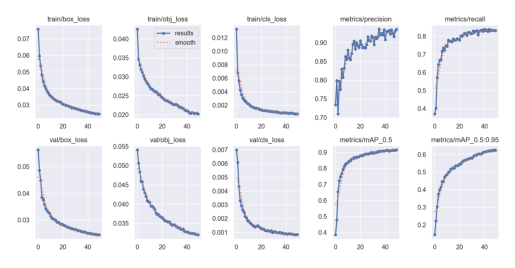

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('C:/Users/amano/PycharmProjects/pythonProject/yolov5/runs/train/exp2/results.png')
plt.imshow(image)
plt.axis('off')
plt.show()

(The actual code run for ~66 hours)